#Classification using Support Vector Machine
Please do not import any other python library except numpy and matplotlib 

In [1]:
import numpy as np
import csv  #For reading csv file
import matplotlib.pyplot as plt

#Generating Random linearly separable data


In [2]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
    x, y = point
    if 0.5*x - y + 0.25 > 0:
        data[i].append(-1)
    else:
        data[i].append(1)

#Visualizing the above data

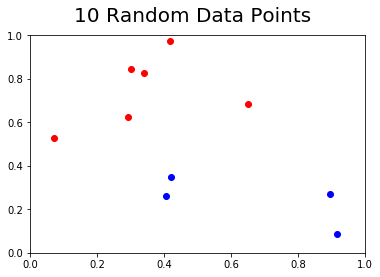

In [3]:
plt.suptitle('10 Random Data Points', fontsize=20)
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(0,1)
    plt.ylim(0,1)

#SVM Classifier
Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. 
You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.

<font color='red'>SVM Function <br>
**svm_function** uses a constant learning rate <br>
**svm_function2** uses diminishing learning rate</font>

In [4]:
def svm_function(x, y, epoch, l_rate,lam=0.00000001):
    w=np.zeros(2)
    b = 0
    for i in range(epoch):
        j=int(np.random.random()*len(y))
        if y[j]*(np.dot(x[j],w)+b)<1:
            w -= l_rate*(2*lam*w-np.dot(x[j],y[j]))
            b += l_rate*y[j]
        else:
            w -= l_rate*(2*lam*w)
    return [b,w[0],w[1]]

In [5]:
def svm_function2(x, y, epoch, l_rate1,lam=0.0000000001):
    w=np.zeros(2)
    b = 0
    for i in range(epoch):
        j=int(np.random.random()*len(y))
        l_rate=l_rate1/(i+1)
        #l_rate=l_rate1/(1+l_rate1*i/C)
        if y[j]*(np.dot(x[j],w)+b)<1:
            w -= (1-l_rate)*lam*w-l_rate*np.dot(x[j],y[j])
            b += l_rate*y[j]
        else:
            w -= (1-l_rate)*lam*w
    return [b,w[0],w[1]]

#Run SVM Classifier

svm_function with constant learining rate is chosen here as it is giving me better results than the pegasos algorithm.
svm_function2 also gives good classification in just 10000 epochs.
svm_function might lead to overfitting on validation data.

Feel free to use both by commenting/uncommenting the desired svm_function in the next cell.

In [6]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)
#w = svm_function2(X, Y, 10000, 100)

#Visualize the classifier
Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated
(0.5*x - y + 0.25). 

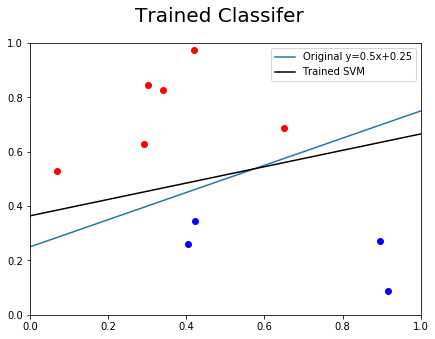

In [7]:
#Using [x1,x2],[y1,y2] for drawing line
x1, y1 = [0, 1], [-w[0]/w[2], (-w[0]-w[1])/w[2]]
x2, y2 = [0, 1], [0.25, 0.75]
plt.rcParams["figure.figsize"] = (7,5)
plt.plot(x2, y2,label='Original y=0.5x+0.25')
plt.plot(x1, y1,label='Trained SVM',c='black')
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
plt.xlim(0,1),plt.ylim(0,1)
plt.legend()
plt.suptitle('Trained Classifer', fontsize=20)
plt.show()

##### Increase the number of data-points and observe number of epochs to converge. Draw plots showing data-points, actual data seprating line and line corrosponding to 'w' you got from svm_function for 10, 20, 30, 40, 50 and 100 data-points. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

svm_function with constant learining rate is chosen here as it is giving me better results than the pegasos algorithm.
svm_function2 also gives good classification in just 10000 epochs.
Also pegasos algorithm works best for larger dataset.

Feel free to use both by commenting/uncommenting the desired svm_function in the next cell.

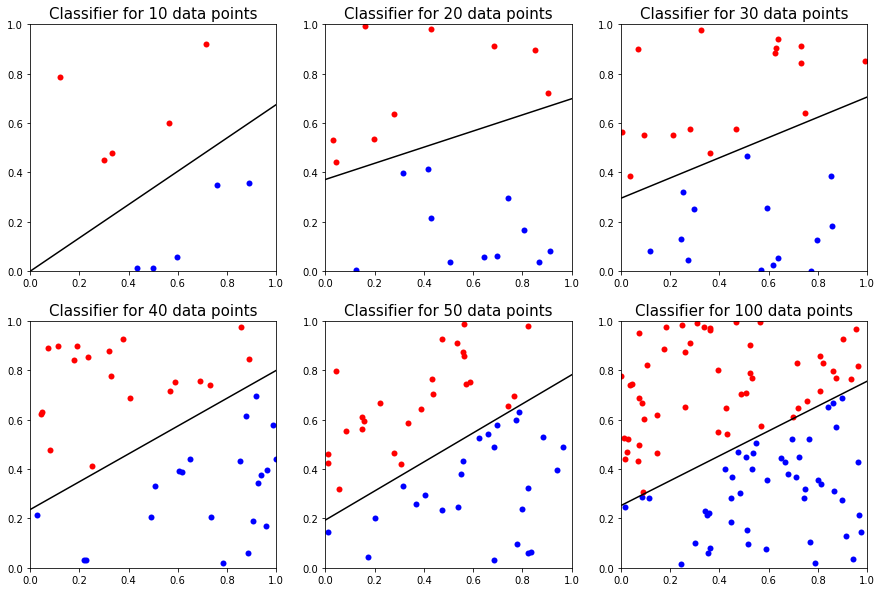

In [8]:
adata=[10,20,30,40,50,100]
wx=[]
fig, ax = plt.subplots(2,3,figsize=(15,10))
for i in range(len(adata)):
    data = [[np.random.rand(), np.random.rand()] for i in range(adata[i])]
    for j, point in enumerate(data):
        x, y = point
        if 0.5*x - y + 0.25 > 0:
            data[j].append(-1)
            ax[i//3,i%3].scatter(x,y,color='blue',linewidths=0)
        else:
            data[j].append(1)
            ax[i//3,i%3].scatter(x,y,color='red',linewidths=0)

    data = np.asarray(data)
    X = data[:,:2]
    Y = data[:,2]
    wx=svm_function(X, Y, 100000, 1)
    #wx=svm_function2(X, Y, 10000, 25)
    x1,y1=[0,1],[-wx[0]/wx[2], (-wx[0]-1*wx[1])/wx[2]]
    
    #ax[i//3,i%3].plot(x2, y2,label='Original')
    ax[i//3,i%3].plot(x1,y1,c='black')
    ax[i//3,i%3].set_title('Classifier for '+str(adata[i])+' data points',size=15)
    ax[i//3,i%3].set_xlim([0,1])
    ax[i//3,i%3].set_ylim([0,1])

plt.show()

#Perturbing the previously created  data
Add noise to the data and visualize the resulting classifier.

In [9]:
for i in range(len(data)):
    data[i][0] += (np.random.rand() - 0.5) / 2.
    data[i][1] += (np.random.rand() - 0.5) / 2.

#Visualizing the perturbed Data

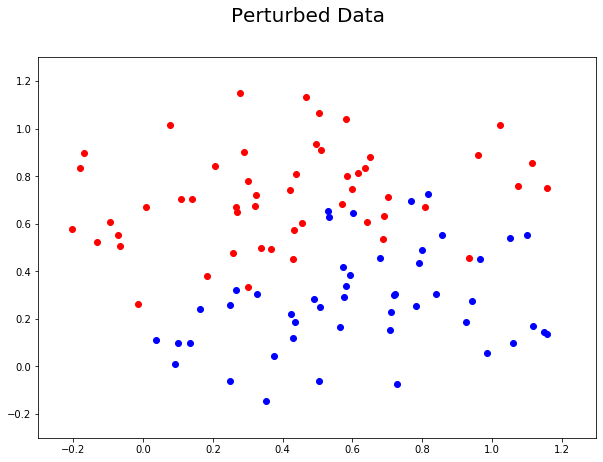

In [10]:
plt.rcParams["figure.figsize"] = (10,7)
plt.suptitle('Perturbed Data', fontsize=20)
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(-0.3,1.3)
    plt.ylim(-0.3,1.3)

#Visualize the classifier trained on noisy data
Plot actual seperating line and seperating line you got from svm_classifier. Do this for 10, 20, 30, 40, 50 and 100 data points. You can vary the scale of noise as well. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

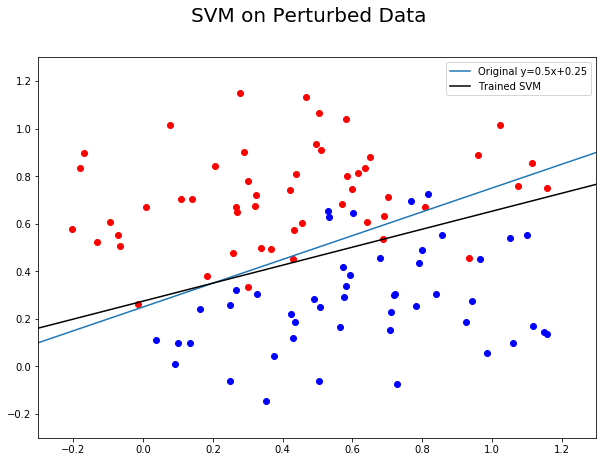

In [11]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w2 = svm_function(X, Y, 100000 , 0.01)
x10, y10 = [-2, 2], [(-w2[0]+2*w2[1])/w2[2], (-w2[0]-2*w2[1])/w2[2]]
xo, yo = [-2, 2], [-0.75, 1.25]
plt.plot(xo,yo,label='Original y=0.5x+0.25')
plt.plot(x10,y10,label='Trained SVM',c='black')
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
plt.xlim(-0.3,1.3),plt.ylim(-0.3,1.3)
plt.legend()
plt.suptitle('SVM on Perturbed Data', fontsize=20)
plt.show()

#Read the Random Non-linear data stored in CSV1 and visualize it

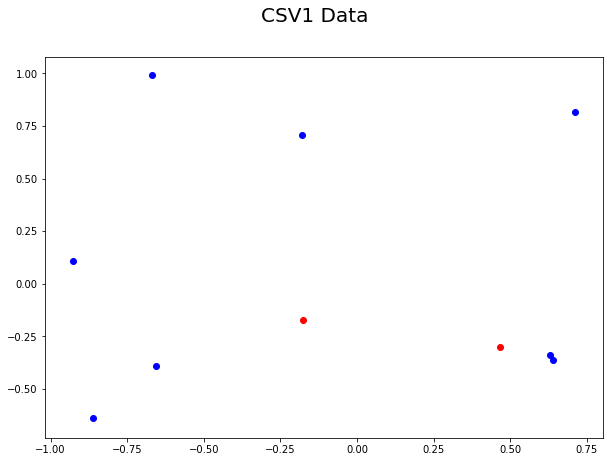

In [12]:
plt.suptitle('CSV1 Data', fontsize=20)
a1=[]
with open('csv1.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if row[2] == '1': 
            clr = 'red'
        else: 
            clr = 'blue'
        a1.append([float(row[0]),float(row[1]),float(row[2])])
        plt.scatter(float(row[0]),float(row[1]), c=clr)

#Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data
For linearly non-separable data, you need to transform the data in a space where it can be linearly seprable. These features can be exponential, polynomial, trignometric or any other function of actual input features. For example, if your input data is (x1, x2) you can have hand-crafted features as (sin(x1), cos(x1), cos(x2), x1-x2). 
Here you need to think of which hand-crafted features can be best suited for data given to you. Write a function to convert input features to hand-crafted features. Use these features to train a SVM using svm_function.
Note that, if you choose to have L hand-crafted features, SVM will return L+1 dimensional 'w'. 


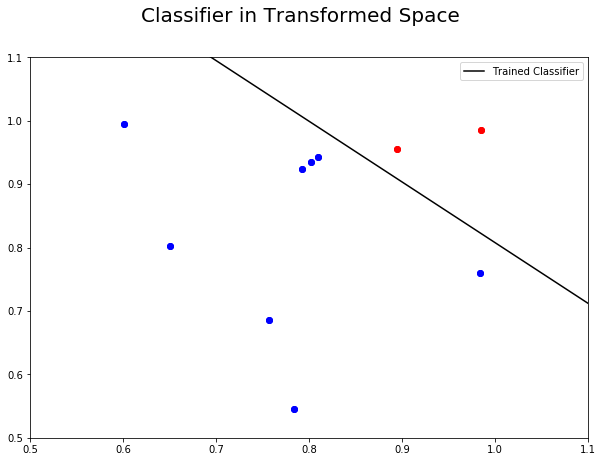

In [13]:
########### Feature Engineering ###########
a2=[]
for i in range(len(a1)):
    a2.append([np.cos(a1[i][0]),np.cos(a1[i][1]),a1[i][2]])
for x, y, l in a2:
    if l == 1:
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    
 ########### Train Classifier ###########
data = np.asarray(a2)
X = data[:,:2]
Y = data[:,2]
wa = svm_function(X, Y, 10000, 1)

############ Visualize Classifier and Data ############
x1, y1 = [0, 2], [-wa[0]/wa[2], (-wa[0]-2*wa[1])/wa[2]]
plt.plot(x1, y1,label='Trained Classifier',c='black')
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
plt.xlim(0.5,1.1),plt.ylim(0.5,1.1)
plt.legend()
plt.suptitle('Classifier in Transformed Space', fontsize=20)
plt.show()

#Visualize decision boundary
Here, as 'w' retuened by svm_function is (L+1) dimensional, you can not visualize it in the form of line in 2D. To visualize non-linear decision boundary in 2D, you can generate few hundred random data-points and can observe if classifier labels them +1 or -1. Then you can plot this points with different colors to get emperical decision boundary. Write the code for visualization of non-linear decision boundary in next cell.

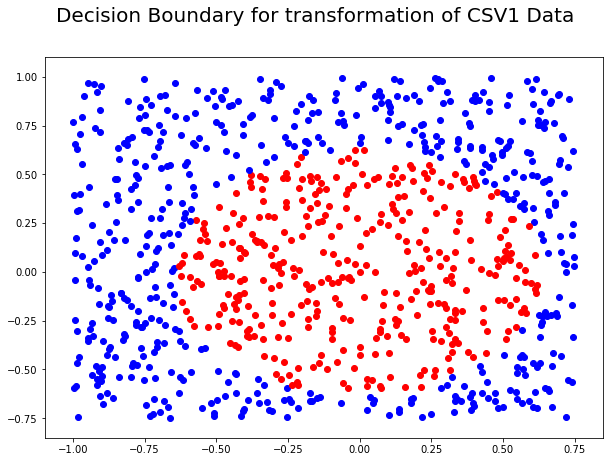

In [14]:
########### Visualise Classifier in Original Space ###########
#-1<x<0.75; -0.75<y<1
a3 = [[np.random.rand()*(1.75)-1, np.random.rand()*1.75-0.75] for i in range(900)]
for i in range(len(a3)):
    x,y=np.cos(a3[i][0]),np.cos(a3[i][1])
    val=wa[0]+wa[1]*x+wa[2]*y
    if val>0:
        a3[i].append(1)
    else:
        a3[i].append(-1)
        
plt.suptitle('Decision Boundary for transformation of CSV1 Data', fontsize=20)
    
for x, y,l in a3:
    if l == 1:
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)

#Read the Random Non-linear data stored in CSV2

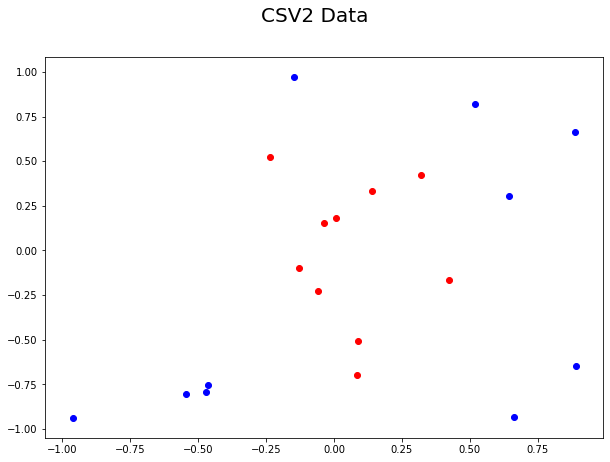

In [15]:
b1=[]
plt.suptitle('CSV2 Data', fontsize=20)
with open('csv2.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if row[2] == '1': 
            clr = 'red'
        else: 
            clr = 'blue'
        plt.scatter((float(row[0])),(float(row[1])), c=clr)
        b1.append([(float(row[0])),(float(row[1])),float(row[2])])

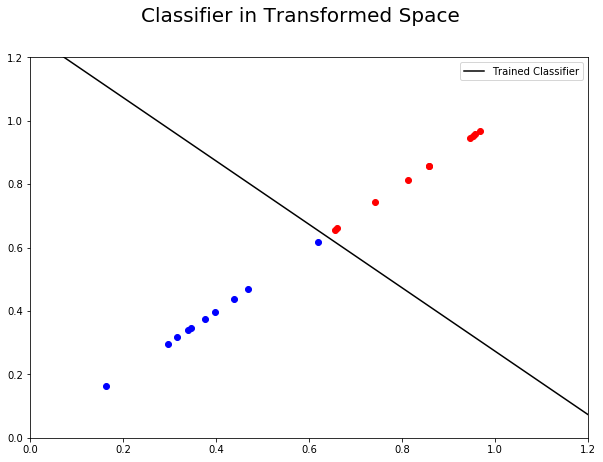

In [16]:
############ Feature Engineering ############
x,y=0.05,-0.05
b2=[]
sigma=1
for i in range(len(b1)):
    b2.append([np.exp(-((b1[i][0]-x)**2+(b1[i][1]-y)**2)/(sigma**2)),np.exp(-((b1[i][0]-x)**2+(b1[i][1]-y)**2)/(sigma**2)),b1[i][2]])
    
 ############ Train Classifier ############
datab = np.asarray(b2)
X = datab[:,:2]
Y = datab[:,2]
wb = svm_function(X, Y, 100000, 1)
x10, y10 = [-2, 2], [(-wb[0]+2*wb[1])/wb[2], (-wb[0]-2*wb[1])/wb[2]]
plt.plot(x10,y10,label='Trained Classifier',c='black')

########### Visualize Classifier and Data ###########
for x, y, l in datab:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.legend()
plt.suptitle('Classifier in Transformed Space', fontsize=20)
plt.show()

#Train a SVM classifier on the non linear data by appropriate features and also visualise it

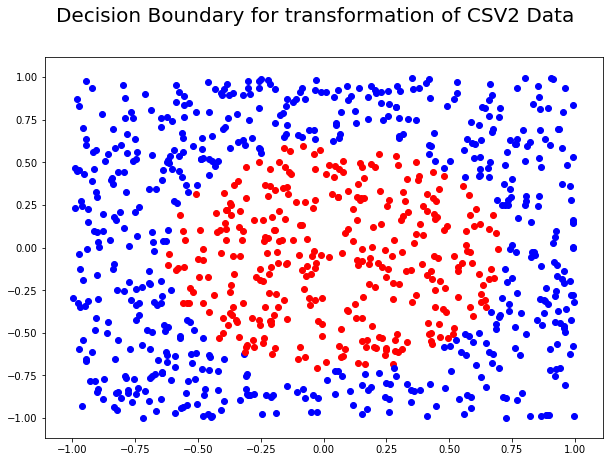

In [17]:
########### Visualise Classifier in Original Space ###########
b3 = [[np.random.rand()*2-1, np.random.rand()*2-1] for i in range(900)]
for i in range(len(b3)):
    x,y=np.exp(-((b3[i][0]-0.05)**2+(b3[i][1]+0.05)**2)/(sigma**2)),np.exp(-((b3[i][0]-0.05)**2+(b3[i][1]+0.05)**2)/(sigma**2))
    val=wb[0]+wb[1]*x+wb[2]*y
    if val>0:
        b3[i].append(1)
    else:
        b3[i].append(-1)
    
plt.suptitle('Decision Boundary for transformation of CSV2 Data', fontsize=20)
for x, y,l in b3:
    if l == 1:
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)

Gaussion Kernel and Cosine Kernel are almost the same in the given data.

#Read the Random Non-linear data stored in CSV3

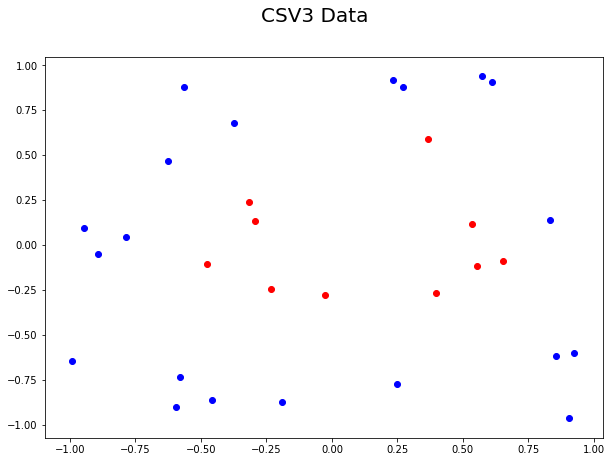

In [18]:
c1=[]
plt.suptitle('CSV3 Data', fontsize=20)
with open('csv3.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if row[2] == '1': 
            clr = 'red'
        else: 
            clr = 'blue'
        c1.append([float(row[0]),float(row[1]),float(row[2])])        
        plt.scatter(float(row[0]),float(row[1]), c=clr)
#plt.xlim(-0.5,1.5),plt.ylim(-0.5,1.5)

#Train a SVM classifier on the non linear data by appropriate Feature Engineering and also visualise it

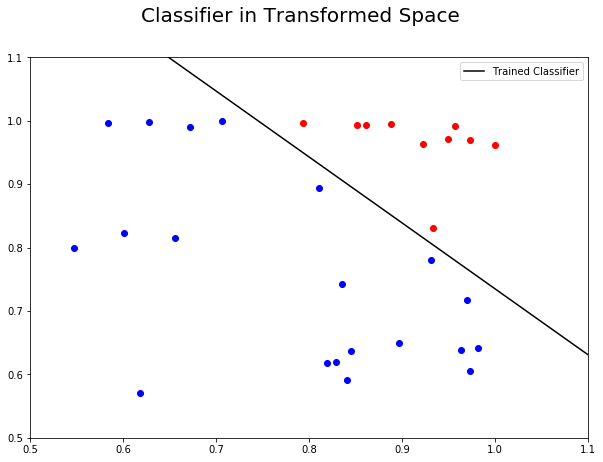

In [19]:
########## Feature Engineering ##########
c2=[]
for i in range(len(c1)):
    c2.append([np.cos(c1[i][0]),np.cos(c1[i][1]),c1[i][2]])
 
 ########## Train Classifier ##########
datac = np.asarray(c2)
X = datac[:,:2]
Y = datac[:,2]
wc = svm_function(X, Y, 100000, 1)

########## Visualize Classifier and Data ##########
x1, y1 = [0, 2], [-wc[0]/wc[2], (-wc[0]-2*wc[1])/wc[2]]
plt.plot(x1, y1,label='Trained Classifier',c='black')
for x, y, l in datac:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
plt.xlim(0.5,1.1),plt.ylim(0.5,1.1)
plt.legend()
plt.suptitle('Classifier in Transformed Space', fontsize=20)
plt.show()

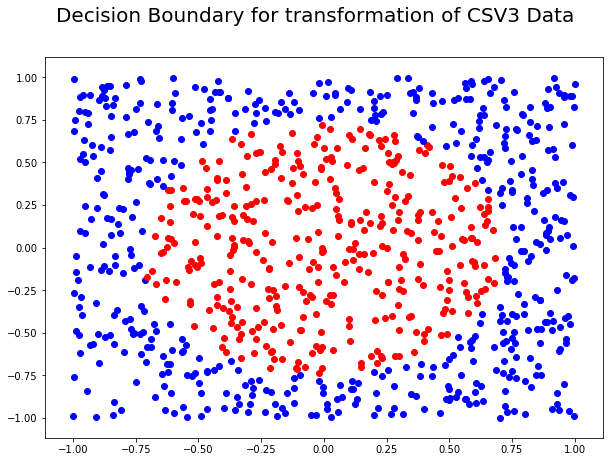

In [20]:
########## Visualise Classifier in Original Space ##########
a3 = [[np.random.rand()*2-1, np.random.rand()*2-1] for i in range(900)]
for i in range(len(a3)):
    x,y=np.cos(a3[i][0]),np.cos(a3[i][1])
    val=wc[0]+wc[1]*x+wc[2]*y
    if val>0:
        a3[i].append(1)
    else:
        a3[i].append(-1)
        
plt.suptitle('Decision Boundary for transformation of CSV3 Data', fontsize=20)   
for x, y,l in a3:
    if l == 1:
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)